In [2]:
# Import Required Packages 
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn 
 
from sklearn import metrics

In [2]:
# to remove teh printing barrier
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)

In [3]:
# TO print multiple outputs in single line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Data Dictionary 

In [5]:
df_dd = pd.read_csv("HomeCredit_columns_description.csv")

In [6]:
df_dd[df_dd['Table'] == 'previous_application.csv'][['Row', 'Description', 'Special']]

,Row,Description,Special
173,SK_ID_PREV,ID of previous credit in Home credit related t...,hashed
174,SK_ID_CURR,ID of loan in our sample,hashed
175,NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loa...",NaN
176,AMT_ANNUITY,Annuity of previous application,NaN
177,AMT_APPLICATION,For how much credit did client ask on the prev...,NaN
178,AMT_CREDIT,Final credit amount on the previous applicatio...,NaN
179,AMT_DOWN_PAYMENT,Down payment on the previous application,NaN
180,AMT_GOODS_PRICE,Goods price of good that client asked for (if ...,NaN
181,WEEKDAY_APPR_PROCESS_START,On which day of the week did the client apply ...,NaN
182,HOUR_APPR_PROCESS_START,Approximately at what day hour did the client ...,rounded


In [5]:
df = pd.read_csv('previous_application.csv')


In [6]:
df.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.tail(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0
1670213,2418762,261212,Cash loans,16431.300,360000.0,360000.0,NaN,360000.0,SUNDAY,10,Y,1,NaN,NaN,NaN,XNA,Approved,-1193,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,48.0,middle,Cash X-Sell: middle,365243.0,-1163.0,247.0,-443.0,-423.0,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Printing the missing and number of unique values for each columns

In [9]:

for col in df.columns:
    print("=============== " + str(col) +" Start===============")
    print("\nUnique values :: " + str(df[col].nunique()))
    print("\nMissing values Count:: " + str(df[col].isnull().sum()))
#     print("\nUnique Values Count:: \n" + str(df[col].value_counts()))
    print("=============== " + str(col) +" End===============")


=============== SK_ID_PREV Start===============

Unique values :: 1670214

Missing values Count:: 0
=============== SK_ID_PREV End===============
=============== SK_ID_CURR Start===============

Unique values :: 338857

Missing values Count:: 0
=============== SK_ID_CURR End===============
=============== NAME_CONTRACT_TYPE Start===============

Unique values :: 4

Missing values Count:: 0
=============== NAME_CONTRACT_TYPE End===============
=============== AMT_ANNUITY Start===============

Unique values :: 357959

Missing values Count:: 372235
=============== AMT_ANNUITY End===============
=============== AMT_APPLICATION Start===============

Unique values :: 93885

Missing values Count:: 0
=============== AMT_APPLICATION End===============
=============== AMT_CREDIT Start===============

Unique values :: 86803

Missing values Count:: 1
=============== AMT_CREDIT End===============
=============== AMT_DOWN_PAYMENT Start===============

Unique values :: 29278

Missing values Count:: 8

#### Observations

- DAYS_LAST_DUE_1ST_VERSION, DAYS_FIRST_DRAWING, DAYS_TERMINATION, DAYS_FIRST_DUE, DAYS_LAST_DUE Columns have max value as 356243 which is a default or garbage value. we will replace these values with mean

- NFLAG_INSURED_ON_APPROVAL : Form the data description it can be found that the deault value can be 0



### Missing value treatment


Annuities: 
Most of us have had the experience of making a series of fixed payments over a period of time—such as rent or car payments—or receiving a series of payments for a period of time, such as interest from a bond or certificate of deposit (CD). These recurring or ongoing payments are technically referred to as "annuities"


CNT_PAYMENT	 : Time required to make the whole payment. the more the tenure the less fiancially stable the client is. 


DAYS_FIRST_DUE - when was the first due date (first installment)

DAYS_LAST_DUE_1ST_VERSION - when was the planned last due date (last installment) - information from the time of application

DAYS_LAST_DUE - when was the last due date (last installment) - most recent information (last due date may change e.g. in case of early repayment or payment difficulties)

NAME_TYPE_SUITE: Let us consider the Nan case as the unUnaccompanied

In [10]:
df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [11]:
df[df['NAME_CONTRACT_STATUS'].isin(['Canceled','Refused','Unused offer'])].head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
unstatus_col =[ 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
        'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'CNT_PAYMENT', 
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']

In [13]:
for col in unstatus_col:
    df[col] = np.where((df['NAME_CONTRACT_STATUS'].isin(['Canceled','Refused','Unused offer'])) & df[col].isnull(), 0, df[col])
    

In [14]:
df.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                          8
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                374400
AMT_GOODS_PRICE                  42835
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               374400
RATE_INTEREST_PRIMARY          1030830
RATE_INTEREST_PRIVILEGED       1030830
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [15]:
columns = df.columns
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

In [16]:
missing_value_df

,percent_missing
SK_ID_PREV,0.000000
SK_ID_CURR,0.000000
NAME_CONTRACT_TYPE,0.000000
AMT_ANNUITY,0.000479
AMT_APPLICATION,0.000000
AMT_CREDIT,0.000060
AMT_DOWN_PAYMENT,22.416289
AMT_GOODS_PRICE,2.564641
WEEKDAY_APPR_PROCESS_START,0.000000
HOUR_APPR_PROCESS_START,0.000000


In [17]:
missing_value_df['unique_values_count'] = df.nunique() 
missing_value_df['unique_percentage'] = (df.nunique()/df.shape[0])*100 

In [18]:
missing_value_df['missing_values'] = df.isnull().sum() 

In [19]:
missing_value_df[missing_value_df['percent_missing']>70]

,percent_missing,unique_values_count,unique_percentage,missing_values


In [20]:
df['CNT_PAYMENT'] = df['CNT_PAYMENT'].fillna(0)
df['CNT_PAYMENT'] = np.where((~df['NAME_CONTRACT_STATUS'].isin(['Canceled','Refused','Unused offer'])) & (df['CNT_PAYMENT']==0)
                             & (df['AMT_ANNUITY']!=0), 
                              (df.AMT_CREDIT/ df.AMT_ANNUITY), 
                              df['CNT_PAYMENT'])


In [21]:
df['NFLAG_INSURED_ON_APPROVAL'].fillna(1)

0          0.0
1          1.0
2          1.0
3          1.0
4          0.0
          ... 
1670209    0.0
1670210    0.0
1670211    0.0
1670212    1.0
1670213    0.0
Name: NFLAG_INSURED_ON_APPROVAL, Length: 1670214, dtype: float64

In [22]:

df['NFLAG_INSURED_ON_APPROVAL'] = np.where(df['NAME_CONTRACT_STATUS'].isnull(), 0, df['NFLAG_INSURED_ON_APPROVAL'])


In [23]:

df['CNT_PAYMENT'].isnull().sum()

4

In [24]:
df.drop(['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','NAME_TYPE_SUITE'], axis=1, inplace=True)

In [25]:
df.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                         8
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_DOWN_PAYMENT               374400
AMT_GOODS_PRICE                 42835
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
RATE_DOWN_PAYMENT              374400
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                         4
NAME_YIELD_G

In [26]:
df[['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION']] =df[['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION']].replace({365243.0:0})

In [27]:
df['DAYS_TERMINATION'].value_counts()

 0.0       859346
-233.0        786
-170.0        770
-184.0        770
-163.0        769
            ...  
-2822.0         1
-2826.0         1
-2815.0         1
-2807.0         1
-2809.0         1
Name: DAYS_TERMINATION, Length: 2830, dtype: int64

In [28]:
df[['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION']] = df[['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION']].fillna(0)

In [29]:
df[df['DAYS_FIRST_DUE'].isnull()].head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL


In [32]:
df[df['AMT_ANNUITY'].isnull()].head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
191373,1655938,203207,Consumer loans,NaN,130050.00,130050.0,0.00,130050.00,WEDNESDAY,11,Y,0,0.000000,XAP,Approved,-559,Cash through the bank,XAP,New,Mobile,POS,XNA,Country-wide,67,Connectivity,14.0,high,POS mobile with interest,0.0,-523.0,-133.0,-133.0,-128.0,0.0
251875,2447775,120570,Cash loans,NaN,270000.00,270000.0,NaN,270000.00,FRIDAY,16,Y,1,NaN,Everyday expenses,Approved,-718,Cash through the bank,XAP,Refreshed,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,0.0,0.0,0.0,0.0,0.0,NaN
287370,1899883,306602,Cash loans,NaN,202500.00,202500.0,NaN,202500.00,MONDAY,10,Y,1,NaN,Medicine,Approved,-505,Cash through the bank,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,0.0,0.0,0.0,0.0,0.0,NaN
627069,1061824,305827,Consumer loans,NaN,80955.00,92952.0,0.00,80955.00,WEDNESDAY,19,Y,0,0.000000,XAP,Approved,-522,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,20,Connectivity,12.0,high,POS mobile with interest,0.0,-484.0,-154.0,-304.0,-301.0,0.0
648826,2320523,352840,Consumer loans,NaN,119812.68,121495.5,11979.18,119812.68,WEDNESDAY,16,Y,0,0.097745,XAP,Approved,-537,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,340,Connectivity,12.0,middle,POS mobile with interest,0.0,-499.0,-169.0,-409.0,-407.0,0.0


In [30]:
df.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                         8
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_DOWN_PAYMENT               374400
AMT_GOODS_PRICE                 42835
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
RATE_DOWN_PAYMENT              374400
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                         4
NAME_YIELD_G

In [31]:
df[['NFLAG_INSURED_ON_APPROVAL', 'RATE_DOWN_PAYMENT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE']] = df[['NFLAG_INSURED_ON_APPROVAL', 'RATE_DOWN_PAYMENT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE']].fillna(0)

In [35]:
df.isnull().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_ANNUITY                      8
AMT_APPLICATION                  0
AMT_CREDIT                       1
AMT_DOWN_PAYMENT                 0
AMT_GOODS_PRICE                  0
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
RATE_DOWN_PAYMENT                0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
SELLERPLACE_AREA                 0
NAME_SELLER_INDUSTRY             0
CNT_PAYMENT                      4
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION            346
DAYS_FIRST_DRAWING  

In [32]:
# filling the null valurs of Product_combinations with "No Data"
df['PRODUCT_COMBINATION'].fillna('No data', inplace=True)

In [33]:
df['CNT_PAYMENT']

0          12.0
1          36.0
2          12.0
3          12.0
4          24.0
           ... 
1670209    30.0
1670210    12.0
1670211    10.0
1670212    12.0
1670213    48.0
Name: CNT_PAYMENT, Length: 1670214, dtype: float64

In [34]:
df[df['CNT_PAYMENT'].isnull()].head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
251875,2447775,120570,Cash loans,NaN,270000.0,270000.0,0.0,270000.0,FRIDAY,16,Y,1,0.0,Everyday expenses,Approved,-718,Cash through the bank,XAP,Refreshed,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,0.0,0.0,0.0,0.0,0.0,0.0
287370,1899883,306602,Cash loans,NaN,202500.0,202500.0,0.0,202500.0,MONDAY,10,Y,1,0.0,Medicine,Approved,-505,Cash through the bank,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,0.0,0.0,0.0,0.0,0.0,0.0
772107,2832275,147296,Cash loans,NaN,225000.0,225000.0,0.0,225000.0,SUNDAY,19,Y,1,0.0,Education,Approved,-373,Cash through the bank,XAP,Refreshed,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,0.0,0.0,0.0,0.0,0.0,0.0
1346611,2317108,448308,Cash loans,NaN,675000.0,675000.0,0.0,675000.0,WEDNESDAY,12,Y,1,0.0,Medicine,Approved,-343,Cash through the bank,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# in all the 4 cases the AMT_CREDIT == AMT_GOODS_PRICE and can be assumed that the full payment is done so replacing the NaN values with 0

In [35]:
df['CNT_PAYMENT'].fillna(0, inplace=True)

In [36]:
df[df['AMT_ANNUITY'].isnull()].head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
191373,1655938,203207,Consumer loans,NaN,130050.00,130050.0,0.00,130050.00,WEDNESDAY,11,Y,0,0.000000,XAP,Approved,-559,Cash through the bank,XAP,New,Mobile,POS,XNA,Country-wide,67,Connectivity,14.0,high,POS mobile with interest,0.0,-523.0,-133.0,-133.0,-128.0,0.0
251875,2447775,120570,Cash loans,NaN,270000.00,270000.0,0.00,270000.00,FRIDAY,16,Y,1,0.000000,Everyday expenses,Approved,-718,Cash through the bank,XAP,Refreshed,XNA,XNA,XNA,Credit and cash offices,-1,XNA,0.0,XNA,Cash,0.0,0.0,0.0,0.0,0.0,0.0
287370,1899883,306602,Cash loans,NaN,202500.00,202500.0,0.00,202500.00,MONDAY,10,Y,1,0.000000,Medicine,Approved,-505,Cash through the bank,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,0.0,XNA,Cash,0.0,0.0,0.0,0.0,0.0,0.0
627069,1061824,305827,Consumer loans,NaN,80955.00,92952.0,0.00,80955.00,WEDNESDAY,19,Y,0,0.000000,XAP,Approved,-522,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,20,Connectivity,12.0,high,POS mobile with interest,0.0,-484.0,-154.0,-304.0,-301.0,0.0
648826,2320523,352840,Consumer loans,NaN,119812.68,121495.5,11979.18,119812.68,WEDNESDAY,16,Y,0,0.097745,XAP,Approved,-537,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,340,Connectivity,12.0,middle,POS mobile with interest,0.0,-499.0,-169.0,-409.0,-407.0,0.0


In [37]:
df['AMT_ANNUITY'].fillna(0, inplace=True)

In [43]:
df.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_DOWN_PAYMENT               0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
RATE_DOWN_PAYMENT              0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
DAYS_FIRST_DRAWING             0
DAYS_FIRST_DUE                 0
DAYS_LAST_

In [38]:
df['AMT_CREDIT'].fillna(0, inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 34 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1670214 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670214 non-null  float64
 6   AMT_DOWN_PAYMENT             1670214 non-null  float64
 7   AMT_GOODS_PRICE              1670214 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            1670214 non-n

In [40]:
df.select_dtypes(['object']).columns


Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [41]:
df.select_dtypes(['object']).head()


,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,Consumer loans,SATURDAY,Y,XAP,Approved,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,Connectivity,middle,POS mobile with interest
1,Cash loans,THURSDAY,Y,XNA,Approved,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,XNA,low_action,Cash X-Sell: low
2,Cash loans,TUESDAY,Y,XNA,Approved,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,high,Cash X-Sell: high
3,Cash loans,MONDAY,Y,XNA,Approved,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,middle,Cash X-Sell: middle
4,Cash loans,THURSDAY,Y,Repairs,Refused,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,XNA,high,Cash Street: high


##  

-We will replace the days names with below values 
SUNDAY - 0

MONDAY -1

TUESDAY - 2

WEDNESDAY - 3

THURSDAY- 4

FRIDAY - 5

SATURDAY -6

In [42]:
df['WEEKDAY_APPR_PROCESS_START'] = df['WEEKDAY_APPR_PROCESS_START'].replace({'SUNDAY':0, 'MONDAY':1, 'TUESDAY':2, 'WEDNESDAY':3,
                                                                            'THURSDAY':4, 'FRIDAY':5, 'SATURDAY':6
                                                                            })

In [43]:
df['FLAG_LAST_APPL_PER_CONTRACT'] = df['FLAG_LAST_APPL_PER_CONTRACT'].replace({'No':0, 'Yes':1
                                                                            })


In [44]:
df['WEEKDAY_APPR_PROCESS_START'].value_counts()

2    255118
3    255010
1    253557
5    252048
4    249099
6    240631
0    164751
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [45]:
df.select_dtypes(['object']).columns

Index(['NAME_CONTRACT_TYPE', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

### Since the above columns are more ccategorical values it is hard label encode the,

In [46]:
df.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_DOWN_PAYMENT               0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
RATE_DOWN_PAYMENT              0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
DAYS_FIRST_DRAWING             0
DAYS_FIRST_DUE                 0
DAYS_LAST_

### Correlation Matrix 

<Figure size 1440x1440 with 0 Axes>

<AxesSubplot:>

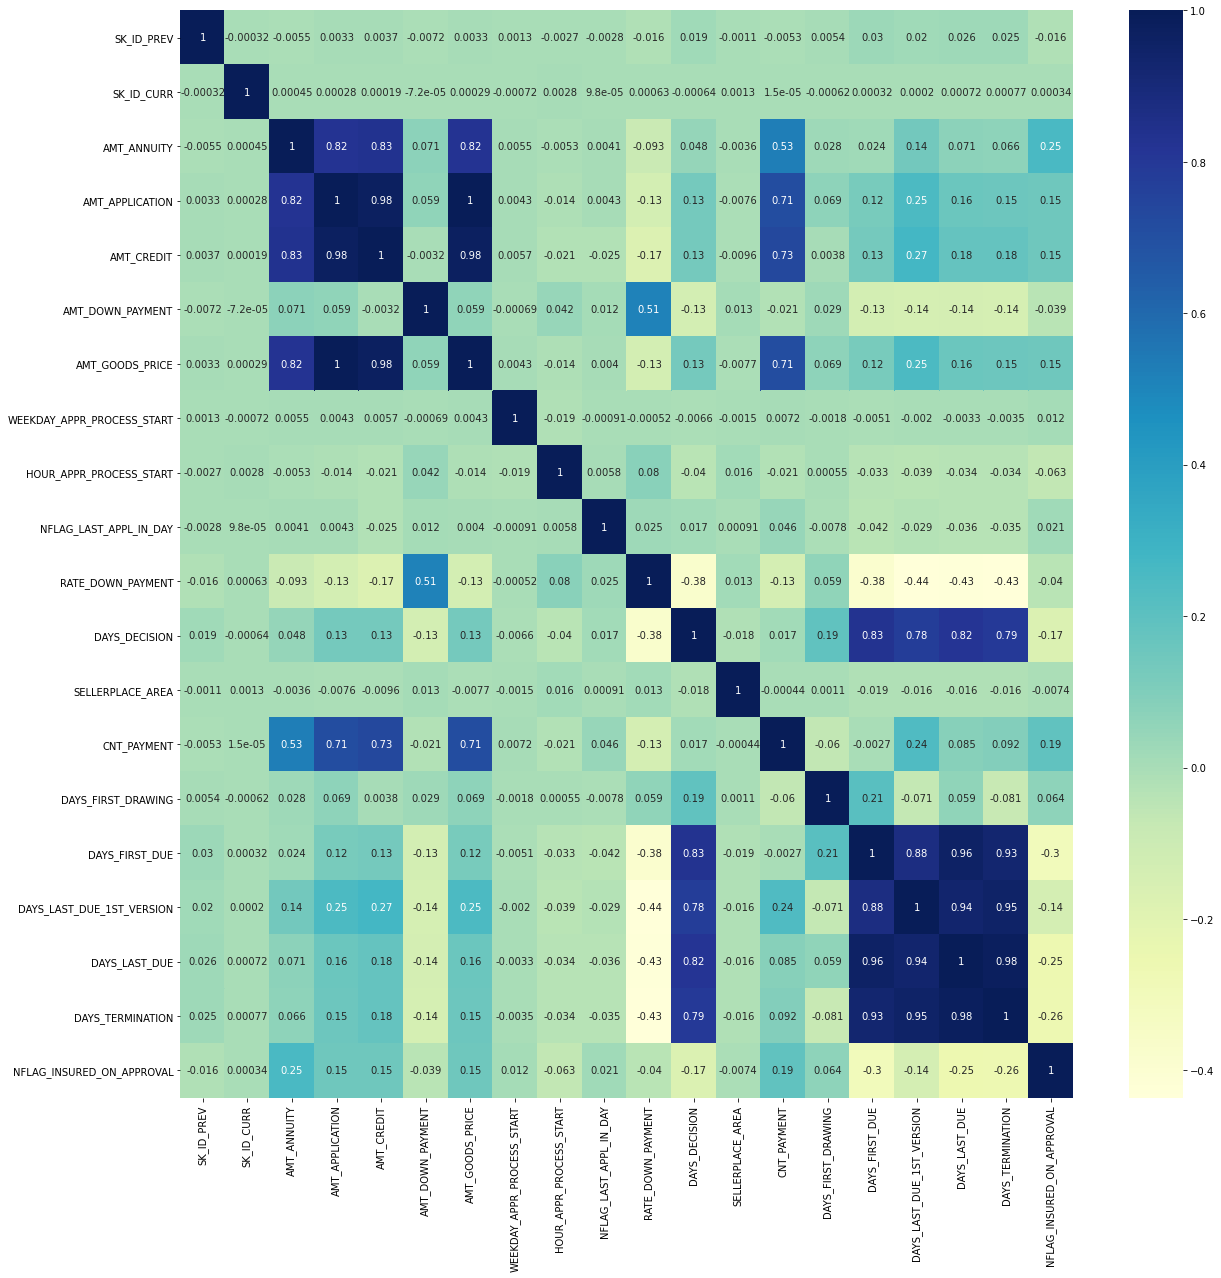

In [53]:
df_corr=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df_corr,annot=True, cmap="YlGnBu")

Columns to drop

1. Days_termination
2. DAYS_LAST_DUE_1ST_VERSION

3.

In [47]:
df.drop(['DAYS_LAST_DUE_1ST_VERSION','DAYS_TERMINATION'], axis=1, inplace=True)

In [48]:
df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

<Figure size 1224x72 with 0 Axes>

<AxesSubplot:xlabel='SK_ID_PREV'>

<Figure size 1224x72 with 0 Axes>

<AxesSubplot:xlabel='SK_ID_CURR'>

<Figure size 1224x72 with 0 Axes>

<AxesSubplot:xlabel='AMT_ANNUITY'>

<Figure size 1224x72 with 0 Axes>

<AxesSubplot:xlabel='AMT_APPLICATION'>

<Figure size 1224x72 with 0 Axes>

<AxesSubplot:xlabel='AMT_CREDIT'>

<Figure size 1224x72 with 0 Axes>

<AxesSubplot:xlabel='AMT_DOWN_PAYMENT'>

<Figure size 1224x72 with 0 Axes>

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

<Figure size 1224x72 with 0 Axes>

<AxesSubplot:xlabel='WEEKDAY_APPR_PROCESS_START'>

<Figure size 1224x72 with 0 Axes>

<AxesSubplot:xlabel='HOUR_APPR_PROCESS_START'>

<Figure size 1224x72 with 0 Axes>

<AxesSubplot:xlabel='NFLAG_LAST_APPL_IN_DAY'>

<Figure size 1224x72 with 0 Axes>

<AxesSubplot:xlabel='RATE_DOWN_PAYMENT'>

<Figure size 1224x72 with 0 Axes>

<AxesSubplot:xlabel='DAYS_DECISION'>

<Figure size 1224x72 with 0 Axes>

<AxesSubplot:xlabel='SELLERPLACE_AREA'>

<Figure size 1224x72 with 0 Axes>

<AxesSubplot:xlabel='CNT_PAYMENT'>

<Figure size 1224x72 with 0 Axes>

<AxesSubplot:xlabel='DAYS_FIRST_DRAWING'>

<Figure size 1224x72 with 0 Axes>

<AxesSubplot:xlabel='DAYS_FIRST_DUE'>

<Figure size 1224x72 with 0 Axes>

<AxesSubplot:xlabel='DAYS_LAST_DUE'>

<Figure size 1224x72 with 0 Axes>

<AxesSubplot:xlabel='NFLAG_INSURED_ON_APPROVAL'>

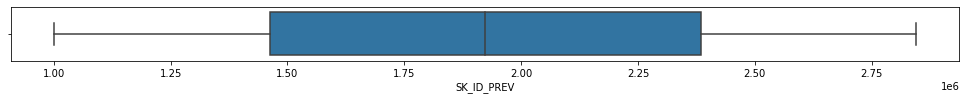

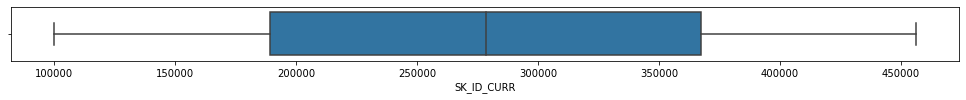

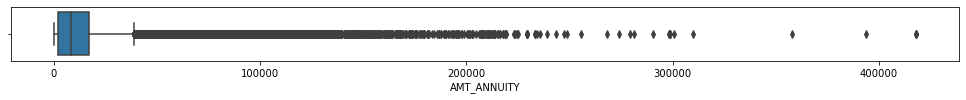

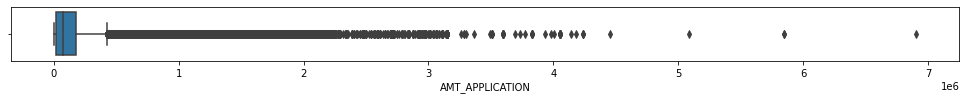

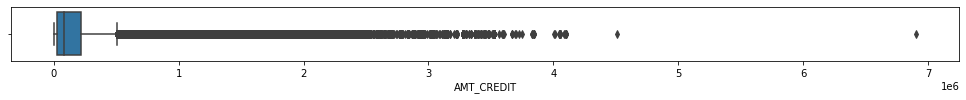

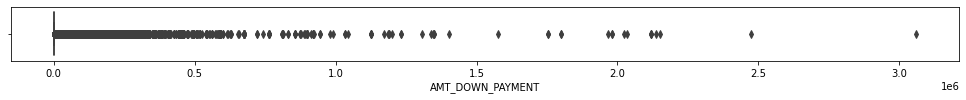

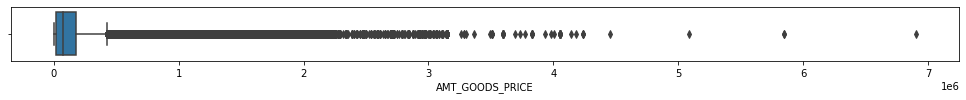

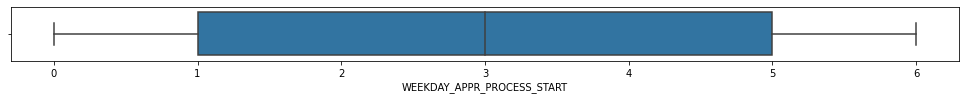

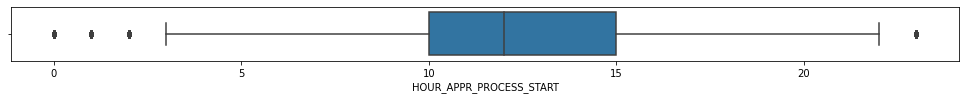

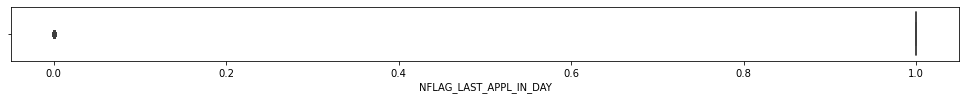

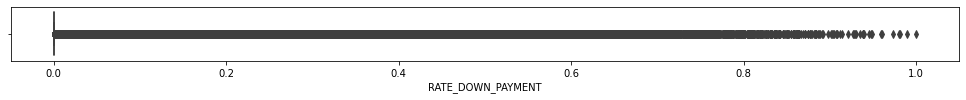

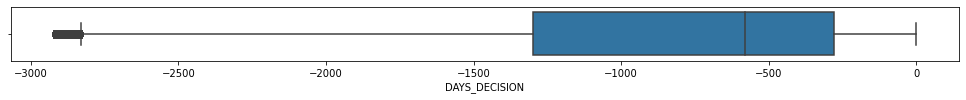

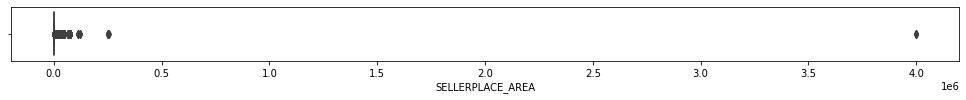

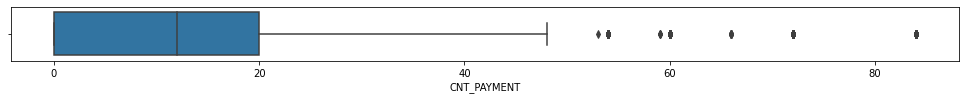

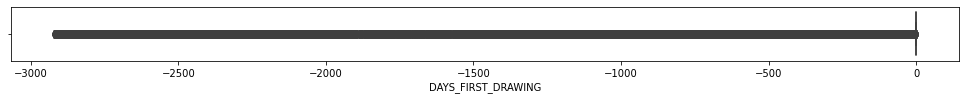

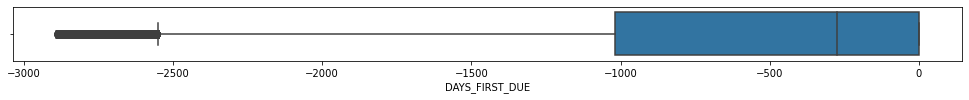

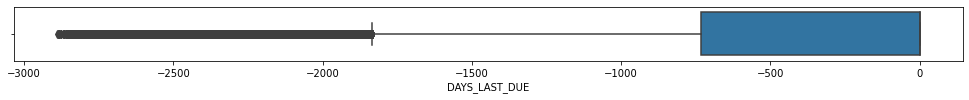

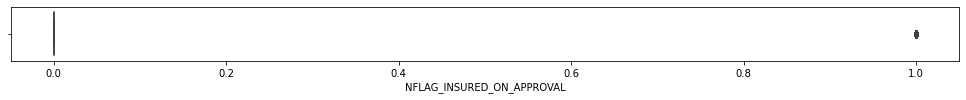

In [49]:

num_col = df.select_dtypes(exclude=['object'])
# num_col = set(num_col.columns) - set(['SK_ID_PREV', 'SK_ID_CURR'])
for column in num_col:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=num_col, x=column)

In [50]:
df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,6,15,Y,1,0.0,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,0.0,-42.0,-42.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,0.0,607500.0,4,11,Y,1,0.0,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,0.0,-134.0,0.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,0.0,112500.0,2,11,Y,1,0.0,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,0.0,-271.0,0.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,0.0,450000.0,1,7,Y,1,0.0,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,0.0,-482.0,-182.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,0.0,337500.0,4,9,Y,1,0.0,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,0.0,0.0,0.0,0.0


In [51]:
df.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_DOWN_PAYMENT               0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
RATE_DOWN_PAYMENT              0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
DAYS_FIRST_DRAWING             0
DAYS_FIRST_DUE                 0
DAYS_LAST_

In [52]:
df['SK_ID_CURR'].nunique()

338857

In [53]:
df.shape

(1670214, 32)

In [54]:
df[df['SK_ID_CURR']==222912]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL
112135,1381826,222912,Cash loans,14403.195,180000.0,197820.0,0.0,180000.0,3,12,Y,1,0.000000,XNA,Approved,-1757,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,middle,Cash X-Sell: middle,0.0,-1727.0,-1217.0,1.0
266616,1876658,222912,Consumer loans,5596.470,29700.0,29700.0,0.0,29700.0,1,10,Y,1,0.000000,XAP,Approved,-44,Cash through the bank,XAP,Repeater,Auto Accessories,POS,XNA,Stone,40,Auto technology,6.0,middle,POS other with interest,0.0,-14.0,0.0,0.0
406547,1505154,222912,Cash loans,0.000,0.0,0.0,0.0,0.0,1,13,Y,1,0.000000,XNA,Canceled,-408,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,0.0,XNA,Cash,0.0,0.0,0.0,0.0
406548,2067201,222912,Cash loans,15991.560,157500.0,167895.0,0.0,157500.0,1,13,Y,1,0.000000,Urgent needs,Refused,-408,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,12.0,low_normal,Cash Street: low,0.0,0.0,0.0,0.0
413425,2791808,222912,Cash loans,18101.205,292500.0,324162.0,0.0,292500.0,2,11,Y,1,0.000000,XNA,Approved,-715,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.0,low_normal,Cash X-Sell: low,0.0,-685.0,0.0,1.0
528672,1390321,222912,Consumer loans,7080.075,65070.0,63715.5,6507.0,65070.0,2,10,Y,1,0.100918,XAP,Approved,-827,Cash through the bank,XAP,Repeater,Furniture,POS,XNA,Stone,50,Furniture,10.0,low_normal,POS industry with interest,0.0,-787.0,-697.0,0.0
609125,1789273,222912,Cash loans,25547.040,247500.0,260896.5,0.0,247500.0,5,10,Y,1,0.000000,XNA,Approved,-1118,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,0.0,-1088.0,-938.0,1.0
681693,2480232,222912,Consumer loans,5830.920,50850.0,49540.5,5085.0,50850.0,4,12,Y,1,0.101382,XAP,Approved,-2428,Cash through the bank,XAP,Repeater,Furniture,POS,XNA,Stone,70,Industry,10.0,middle,POS industry with interest,0.0,-2393.0,-2123.0,0.0
716113,1157039,222912,Consumer loans,3994.290,43294.5,38961.0,4333.5,43294.5,3,15,Y,1,0.109011,XAP,Approved,-630,Cash through the bank,XAP,Repeater,Auto Accessories,POS,XNA,Stone,40,Auto technology,12.0,middle,POS other with interest,0.0,-598.0,-538.0,0.0
831742,1992376,222912,Cash loans,0.000,0.0,0.0,0.0,0.0,1,12,Y,1,0.000000,XNA,Canceled,-408,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,0.0,XNA,Cash,0.0,0.0,0.0,0.0


In [55]:
df.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [56]:

for col in df.select_dtypes(['object']).columns:
    print("=============== " + str(col) +" Start===============")
    print("\nUnique values :: " + str(df[col].nunique()))
    print("\nMissing values Count:: " + str(df[col].isnull().sum()))
    print("\nUnique Values Count:: \n" + str(df[col].value_counts()))
    print("=============== " + str(col) +" End===============")


=============== NAME_CONTRACT_TYPE Start===============

Unique values :: 4

Missing values Count:: 0

Unique Values Count:: 
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64
=============== NAME_CONTRACT_TYPE End===============
=============== FLAG_LAST_APPL_PER_CONTRACT Start===============

Unique values :: 2

Missing values Count:: 0

Unique Values Count:: 
Y    1661739
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64
=============== FLAG_LAST_APPL_PER_CONTRACT End===============
=============== NAME_CASH_LOAN_PURPOSE Start===============

Unique values :: 25

Missing values Count:: 0

Unique Values Count:: 
XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house

In [57]:
encoding_col = 'CHANNEL_TYPE', 'NAME_PORTFOLIO','NAME_GOODS_CATEGORY','NAME_CLIENT_TYPE','CODE_REJECT_REASON','NAME_CONTRACT_STATUS','NAME_CONTRACT_TYPE'

### Renameing the categories  for Product Combinations

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
No data                              346

In [60]:
df['PRODUCT_COMBINATION'].replace({'Cash X-Sell: middle':'Cash',
 'Cash X-Sell: high':'Cash',
 'Cash X-Sell: low':'Cash',
'Card X-Sell':'Card',
 
 'Cash Street: middle':'Cash', 
'Cash Street: low':'Cash',
'Cash Street: high':'Cash',

 'Card Street':'Card',
 'Card X-Sell':'Card',
 
 'POS household with interest':'POS',
 'POS mobile with interest':'POS',
 'POS industry with interest':'POS',
 'POS other with interest':'POS',
 
 
 'POS household without interest':'POS_NO',
 'POS industry without interest':'POS_NO',
 'POS others without interest':'POS_NO',
  'POS mobile without interest':'POS_NO',

}, inplace=True) 

In [61]:
df['PRODUCT_COMBINATION'].value_counts()

Cash       747553
POS        607004
Card       193164
POS_NO     122147
No data       346
Name: PRODUCT_COMBINATION, dtype: int64

In [62]:
df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,6,15,Y,1,0.0,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS,0.0,-42.0,-42.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,0.0,607500.0,4,11,Y,1,0.0,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash,0.0,-134.0,0.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,0.0,112500.0,2,11,Y,1,0.0,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash,0.0,-271.0,0.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,0.0,450000.0,1,7,Y,1,0.0,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash,0.0,-482.0,-182.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,0.0,337500.0,4,9,Y,1,0.0,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash,0.0,0.0,0.0,0.0


In [63]:
df['NAME_PAYMENT_TYPE'].value_counts()

Cash through the bank                        1033552
XNA                                           627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

In [64]:
df['NAME_PAYMENT_TYPE'].replace({'Cash through the bank':'Cash_bank',
 'Non-cash from your account':'NON_cash_account',
 'Cashless from the account of the employer':'NON_cash_account_employer',

}, inplace=True) 

In [65]:
df['NAME_PAYMENT_TYPE'].value_counts()

Cash_bank                    1033552
XNA                           627384
NON_cash_account                8193
NON_cash_account_employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

In [68]:
df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,6,15,Y,1,0.000000,XAP,Approved,-73,Cash_bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS,0.0,-42.0,-42.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,0.0,607500.0,4,11,Y,1,0.000000,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash,0.0,-134.0,0.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,0.0,112500.0,2,11,Y,1,0.000000,XNA,Approved,-301,Cash_bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash,0.0,-271.0,0.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,0.0,450000.0,1,7,Y,1,0.000000,XNA,Approved,-512,Cash_bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash,0.0,-482.0,-182.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,0.0,337500.0,4,9,Y,1,0.000000,Other,Refused,-781,Cash_bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,3,12,Y,1,0.000000,XAP,Approved,-544,Cash_bank,XAP,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS,0.0,-508.0,-358.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,2,15,Y,1,0.340554,XAP,Approved,-1694,Cash_bank,XAP,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS,0.0,-1604.0,-1304.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,1,12,Y,1,0.101401,XAP,Approved,-1488,Cash_bank,XAP,Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS,0.0,-1457.0,-1187.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,0.0,180000.0,3,9,Y,1,0.000000,XNA,Approved,-1185,Cash_bank,XAP,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash,0.0,-1155.0,-825.0,1.0


In [66]:
df["NAME_CASH_LOAN_PURPOSE"] = np.where(~df["NAME_CASH_LOAN_PURPOSE"].isin(["XAP", "XNA"]), "Other", df["NAME_CASH_LOAN_PURPOSE"])

In [69]:
df_2 = df.copy()

In [70]:
str_cols = df.select_dtypes('object').columns

### Applying the One hot encoding 

In [71]:
# Dummification on all he fields
for col in str_cols:
    y_dummies = pd.get_dummies(df[col], prefix=col, drop_first= False)
    df = pd.concat([df, y_dummies], axis=1)
    

In [72]:
df.drop(str_cols, inplace=True, axis=1)

In [73]:
str_cols

Index(['NAME_CONTRACT_TYPE', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [74]:
df.shape
df_2.shape

(1670214, 113)

(1670214, 32)

In [75]:
df.head()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_XNA,FLAG_LAST_APPL_PER_CONTRACT_N,FLAG_LAST_APPL_PER_CONTRACT_Y,NAME_CASH_LOAN_PURPOSE_Other,NAME_CASH_LOAN_PURPOSE_XAP,NAME_CASH_LOAN_PURPOSE_XNA,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Unused offer,NAME_PAYMENT_TYPE_Cash_bank,NAME_PAYMENT_TYPE_NON_cash_account,NAME_PAYMENT_TYPE_NON_cash_account_employer,NAME_PAYMENT_TYPE_XNA,CODE_REJECT_REASON_CLIENT,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_XAP,CODE_REJECT_REASON_XNA,NAME_CLIENT_TYPE_New,NAME_CLIENT_TYPE_Refreshed,NAME_CLIENT_TYPE_Repeater,NAME_CLIENT_TYPE_XNA,NAME_GOODS_CATEGORY_Additional Service,NAME_GOODS_CATEGORY_Animals,NAME_GOODS_CATEGORY_Audio/Video,NAME_GOODS_CATEGORY_Auto Accessories,NAME_GOODS_CATEGORY_Clothing and Accessories,NAME_GOODS_CATEGORY_Computers,NAME_GOODS_CATEGORY_Construction Materials,NAME_GOODS_CATEGORY_Consumer Electronics,NAME_GOODS_CATEGORY_Direct Sales,NAME_GOODS_CATEGORY_Education,NAME_GOODS_CATEGORY_Fitness,NAME_GOODS_CATEGORY_Furniture,NAME_GOODS_CATEGORY_Gardening,NAME_GOODS_CATEGORY_Homewares,NAME_GOODS_CATEGORY_House Construction,NAME_GOODS_CATEGORY_Insurance,NAME_GOODS_CATEGORY_Jewelry,NAME_GOODS_CATEGORY_Medical Supplies,NAME_GOODS_CATEGORY_Medicine,NAME_GOODS_CATEGORY_Mobile,NAME_GOODS_CATEGORY_Office Appliances,NAME_GOODS_CATEGORY_Other,NAME_GOODS_CATEGORY_Photo / Cinema Equipment,NAME_GOODS_CATEGORY_Sport and Leisure,NAME_GOODS_CATEGORY_Tourism,NAME_GOODS_CATEGORY_Vehicles,NAME_GOODS_CATEGORY_Weapon,NAME_GOODS_CATEGORY_XNA,NAME_PORTFOLIO_Cards,NAME_PORTFOLIO_Cars,NAME_PORTFOLIO_Cash,NAME_PORTFOLIO_POS,NAME_PORTFOLIO_XNA,NAME_PRODUCT_TYPE_XNA,NAME_PRODUCT_TYPE_walk-in,NAME_PRODUCT_TYPE_x-sell,CHANNEL_TYPE_AP+ (Cash loan),CHANNEL_TYPE_Car dealer,CHANNEL_TYPE_Channel of corporate sales,CHANNEL_TYPE_Contact center,CHANNEL_TYPE_Country-wide,CHANNEL_TYPE_Credit and cash offices,CHANNEL_TYPE_Regional / Local,CHANNEL_TYPE_Stone,NAME_SELLER_INDUSTRY_Auto technology,NAME_SELLER_INDUSTRY_Clothing,NAME_SELLER_INDUSTRY_Connectivity,NAME_SELLER_INDUSTRY_Construction,NAME_SELLER_INDUSTRY_Consumer electronics,NAME_SELLER_INDUSTRY_Furniture,NAME_SELLER_INDUSTRY_Industry,NAME_SELLER_INDUSTRY_Jewelry,NAME_SELLER_INDUSTRY_MLM partners,NAME_SELLER_INDUSTRY_Tourism,NAME_SELLER_INDUSTRY_XNA,NAME_YIELD_GROUP_XNA,NAME_YIELD_GROUP_high,NAME_YIELD_GROUP_low_action,NAME_YIELD_GROUP_low_normal,NAME_YIELD_GROUP_middle,PRODUCT_COMBINATION_Card,PRODUCT_COMBINATION_Cash,PRODUCT_COMBINATION_No data,PRODUCT_COMBINATION_POS,PRODUCT_COMBINATION_POS_NO
0,2030495,271877,1730.430,17145.0,17145.0,0.0,17145.0,6,15,1,0.0,-73,35,12.0,0.0,-42.0,-42.0,0.0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2802425,108129,25188.615,607500.0,679671.0,0.0,607500.0,4,11,1,0.0,-164,-1,36.0,0.0,-134.0,0.0,1.0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
2,2523466,122040,15060.735,112500.0,136444.5,0.0,112500.0,2,11,1,0.0,-301,-1,12.0,0.0,-271.0,0.0,1.0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
3,2819243,176158,47041.335,450000.0,470790.0,0.0,450000.0,1,7,1,

In [ ]:
Droping the time columns

In [76]:
date_col = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','DAYS_FIRST_DUE','DAYS_LAST_DUE']

In [77]:
df.drop(date_col, inplace=True, axis=1)

### Dropping teh Date columns as they might not be having an impact for the final prediction

In [78]:
df.head()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,NFLAG_INSURED_ON_APPROVAL,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_XNA,FLAG_LAST_APPL_PER_CONTRACT_N,FLAG_LAST_APPL_PER_CONTRACT_Y,NAME_CASH_LOAN_PURPOSE_Other,NAME_CASH_LOAN_PURPOSE_XAP,NAME_CASH_LOAN_PURPOSE_XNA,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Unused offer,NAME_PAYMENT_TYPE_Cash_bank,NAME_PAYMENT_TYPE_NON_cash_account,NAME_PAYMENT_TYPE_NON_cash_account_employer,NAME_PAYMENT_TYPE_XNA,CODE_REJECT_REASON_CLIENT,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_XAP,CODE_REJECT_REASON_XNA,NAME_CLIENT_TYPE_New,NAME_CLIENT_TYPE_Refreshed,NAME_CLIENT_TYPE_Repeater,NAME_CLIENT_TYPE_XNA,NAME_GOODS_CATEGORY_Additional Service,NAME_GOODS_CATEGORY_Animals,NAME_GOODS_CATEGORY_Audio/Video,NAME_GOODS_CATEGORY_Auto Accessories,NAME_GOODS_CATEGORY_Clothing and Accessories,NAME_GOODS_CATEGORY_Computers,NAME_GOODS_CATEGORY_Construction Materials,NAME_GOODS_CATEGORY_Consumer Electronics,NAME_GOODS_CATEGORY_Direct Sales,NAME_GOODS_CATEGORY_Education,NAME_GOODS_CATEGORY_Fitness,NAME_GOODS_CATEGORY_Furniture,NAME_GOODS_CATEGORY_Gardening,NAME_GOODS_CATEGORY_Homewares,NAME_GOODS_CATEGORY_House Construction,NAME_GOODS_CATEGORY_Insurance,NAME_GOODS_CATEGORY_Jewelry,NAME_GOODS_CATEGORY_Medical Supplies,NAME_GOODS_CATEGORY_Medicine,NAME_GOODS_CATEGORY_Mobile,NAME_GOODS_CATEGORY_Office Appliances,NAME_GOODS_CATEGORY_Other,NAME_GOODS_CATEGORY_Photo / Cinema Equipment,NAME_GOODS_CATEGORY_Sport and Leisure,NAME_GOODS_CATEGORY_Tourism,NAME_GOODS_CATEGORY_Vehicles,NAME_GOODS_CATEGORY_Weapon,NAME_GOODS_CATEGORY_XNA,NAME_PORTFOLIO_Cards,NAME_PORTFOLIO_Cars,NAME_PORTFOLIO_Cash,NAME_PORTFOLIO_POS,NAME_PORTFOLIO_XNA,NAME_PRODUCT_TYPE_XNA,NAME_PRODUCT_TYPE_walk-in,NAME_PRODUCT_TYPE_x-sell,CHANNEL_TYPE_AP+ (Cash loan),CHANNEL_TYPE_Car dealer,CHANNEL_TYPE_Channel of corporate sales,CHANNEL_TYPE_Contact center,CHANNEL_TYPE_Country-wide,CHANNEL_TYPE_Credit and cash offices,CHANNEL_TYPE_Regional / Local,CHANNEL_TYPE_Stone,NAME_SELLER_INDUSTRY_Auto technology,NAME_SELLER_INDUSTRY_Clothing,NAME_SELLER_INDUSTRY_Connectivity,NAME_SELLER_INDUSTRY_Construction,NAME_SELLER_INDUSTRY_Consumer electronics,NAME_SELLER_INDUSTRY_Furniture,NAME_SELLER_INDUSTRY_Industry,NAME_SELLER_INDUSTRY_Jewelry,NAME_SELLER_INDUSTRY_MLM partners,NAME_SELLER_INDUSTRY_Tourism,NAME_SELLER_INDUSTRY_XNA,NAME_YIELD_GROUP_XNA,NAME_YIELD_GROUP_high,NAME_YIELD_GROUP_low_action,NAME_YIELD_GROUP_low_normal,NAME_YIELD_GROUP_middle,PRODUCT_COMBINATION_Card,PRODUCT_COMBINATION_Cash,PRODUCT_COMBINATION_No data,PRODUCT_COMBINATION_POS,PRODUCT_COMBINATION_POS_NO
0,2030495,271877,1730.430,17145.0,17145.0,0.0,17145.0,1,0.0,-73,35,12.0,0.0,0.0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2802425,108129,25188.615,607500.0,679671.0,0.0,607500.0,1,0.0,-164,-1,36.0,0.0,1.0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
2,2523466,122040,15060.735,112500.0,136444.5,0.0,112500.0,1,0.0,-301,-1,12.0,0.0,1.0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
3,2819243,176158,47041.335,450000.0,470790.0,0.0,450000.0,1,0.0,-512,-1,12.0,0.0,1.0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [81]:
cat_cols = set(df.columns) - set(['SK_ID_PREV', 'SK_ID_CURR'])

### Aggregating the all the fields 

In [82]:
col_aggregations = {}
for col in cat_cols:
    col_aggregations[col] = 'sum'

In [83]:
col_aggregations

{'CHANNEL_TYPE_Credit and cash offices': 'sum',
 'NAME_PORTFOLIO_POS': 'sum',
 'FLAG_LAST_APPL_PER_CONTRACT_Y': 'sum',
 'NAME_GOODS_CATEGORY_Additional Service': 'sum',
 'NAME_CONTRACT_STATUS_Canceled': 'sum',
 'DAYS_DECISION': 'sum',
 'NAME_GOODS_CATEGORY_Tourism': 'sum',
 'NAME_GOODS_CATEGORY_Computers': 'sum',
 'NAME_CONTRACT_TYPE_Revolving loans': 'sum',
 'NAME_GOODS_CATEGORY_Furniture': 'sum',
 'CHANNEL_TYPE_Channel of corporate sales': 'sum',
 'NAME_GOODS_CATEGORY_Direct Sales': 'sum',
 'NAME_GOODS_CATEGORY_Gardening': 'sum',
 'NAME_SELLER_INDUSTRY_Consumer electronics': 'sum',
 'CHANNEL_TYPE_Contact center': 'sum',
 'NAME_GOODS_CATEGORY_Medical Supplies': 'sum',
 'PRODUCT_COMBINATION_POS_NO': 'sum',
 'NAME_PORTFOLIO_Cars': 'sum',
 'NAME_YIELD_GROUP_low_normal': 'sum',
 'NAME_PAYMENT_TYPE_NON_cash_account_employer': 'sum',
 'CODE_REJECT_REASON_SCO': 'sum',
 'NAME_GOODS_CATEGORY_Vehicles': 'sum',
 'NAME_SELLER_INDUSTRY_Furniture': 'sum',
 'NAME_CONTRACT_TYPE_Cash loans': 'sum',
 '

In [84]:
df_final = df.groupby(['SK_ID_CURR']).agg(col_aggregations)


In [93]:
df_final.shape
df.shape

(338857, 107)

(1670214, 109)

In [94]:
df_final.head()


,CHANNEL_TYPE_Credit and cash offices,NAME_PORTFOLIO_POS,FLAG_LAST_APPL_PER_CONTRACT_Y,NAME_GOODS_CATEGORY_Additional Service,NAME_CONTRACT_STATUS_Canceled,DAYS_DECISION,NAME_GOODS_CATEGORY_Tourism,NAME_GOODS_CATEGORY_Computers,NAME_CONTRACT_TYPE_Revolving loans,NAME_GOODS_CATEGORY_Furniture,CHANNEL_TYPE_Channel of corporate sales,NAME_GOODS_CATEGORY_Direct Sales,NAME_GOODS_CATEGORY_Gardening,NAME_SELLER_INDUSTRY_Consumer electronics,CHANNEL_TYPE_Contact center,NAME_GOODS_CATEGORY_Medical Supplies,PRODUCT_COMBINATION_POS_NO,NAME_PORTFOLIO_Cars,NAME_YIELD_GROUP_low_normal,NAME_PAYMENT_TYPE_NON_cash_account_employer,CODE_REJECT_REASON_SCO,NAME_GOODS_CATEGORY_Vehicles,NAME_SELLER_INDUSTRY_Furniture,NAME_CONTRACT_TYPE_Cash loans,AMT_GOODS_PRICE,NAME_CONTRACT_TYPE_XNA,NFLAG_LAST_APPL_IN_DAY,NAME_SELLER_INDUSTRY_Industry,NAME_CLIENT_TYPE_Repeater,NAME_GOODS_CATEGORY_Weapon,NAME_CONTRACT_TYPE_Consumer loans,NAME_GOODS_CATEGORY_Consumer Electronics,NAME_SELLER_INDUSTRY_XNA,RATE_DOWN_PAYMENT,NAME_GOODS_CATEGORY_XNA,CHANNEL_TYPE_Car dealer,NAME_YIELD_GROUP_low_action,NAME_PORTFOLIO_Cards,CNT_PAYMENT,PRODUCT_COMBINATION_POS,PRODUCT_COMBINATION_No data,CODE_REJECT_REASON_SYSTEM,CHANNEL_TYPE_AP+ (Cash loan),PRODUCT_COMBINATION_Cash,NAME_CLIENT_TYPE_Refreshed,NAME_PORTFOLIO_XNA,NAME_CONTRACT_STATUS_Refused,AMT_ANNUITY,NAME_GOODS_CATEGORY_Photo / Cinema Equipment,CODE_REJECT_REASON_SCOFR,NAME_YIELD_GROUP_middle,NAME_YIELD_GROUP_XNA,NAME_SELLER_INDUSTRY_Jewelry,NAME_SELLER_INDUSTRY_Tourism,NAME_PAYMENT_TYPE_XNA,CODE_REJECT_REASON_CLIENT,NAME_CASH_LOAN_PURPOSE_Other,CODE_REJECT_REASON_VERIF,NAME_GOODS_CATEGORY_Construction Materials,CHANNEL_TYPE_Country-wide,NAME_PRODUCT_TYPE_x-sell,NAME_GOODS_CATEGORY_Sport and Leisure,NAME_GOODS_CATEGORY_Mobile,CHANNEL_TYPE_Stone,CODE_REJECT_REASON_HC,NAME_SELLER_INDUSTRY_Construction,NAME_SELLER_INDUSTRY_MLM partners,NAME_CONTRACT_STATUS_Approved,PRODUCT_COMBINATION_Card,FLAG_LAST_APPL_PER_CONTRACT_N,AMT_DOWN_PAYMENT,NAME_GOODS_CATEGORY_Homewares,CHANNEL_TYPE_Regional / Local,NAME_GOODS_CATEGORY_Animals,NAME_CLIENT_TYPE_XNA,AMT_CREDIT,NAME_GOODS_CATEGORY_Auto Accessories,NAME_GOODS_CATEGORY_Clothing and Accessories,AMT_APPLICATION,NAME_GOODS_CATEGORY_Insurance,NAME_PRODUCT_TYPE_XNA,NAME_YIELD_GROUP_high,NAME_PAYMENT_TYPE_NON_cash_account,NAME_GOODS_CATEGORY_Medicine,NAME_GOODS_CATEGORY_House Construction,NAME_GOODS_CATEGORY_Other,NAME_GOODS_CATEGORY_Fitness,NAME_PAYMENT_TYPE_Cash_bank,NAME_PRODUCT_TYPE_walk-in,NAME_PORTFOLIO_Cash,NAME_CASH_LOAN_PURPOSE_XAP,NAME_SELLER_INDUSTRY_Auto technology,NAME_SELLER_INDUSTRY_Connectivity,NAME_SELLER_INDUSTRY_Clothing,NFLAG_INSURED_ON_APPROVAL,NAME_GOODS_CATEGORY_Education,NAME_CONTRACT_STATUS_Unused offer,NAME_GOODS_CATEGORY_Audio/Video,NAME_GOODS_CATEGORY_Office Appliances,CODE_REJECT_REASON_XAP,NAME_GOODS_CATEGORY_Jewelry,DAYS_FIRST_DRAWING,CODE_REJECT_REASON_XNA,SELLERPLACE_AREA,CODE_REJECT_REASON_LIMIT,NAME_CLIENT_TYPE_New,NAME_CASH_LOAN_PURPOSE_XNA
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,0,1,1,0,0,-1740,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24835.5,0,1,0,0,0,1,0,0,0.104326,0,0,0,0,8.0,1,0,0,0,0,1,0,0,3951.000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,2520.0,0,0,0,0,23787.0,0,0,24835.5,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0.0,0,0,0,0,1,0,0.0,0,23,0,0,0
100002,0,1,1,0,0,-606,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,179055.0,0,1,0,0,0,1,0,0,0.000000,0,0,0,0,24.0,1,0,0,0,0,0,0,0,9251.775,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0.0,0,0,0,0,179055.0,0,0,179055.0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0.0,0,0,0,0,1,0,0.0,0,500,0,1,0
100003,1,2,3,0,0,-3915,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1306309.5,0,3,0,1,0,2,1,1,0.100061,1,0,0,0,30.0,2,0,0,0,1,2,0,0,169661.970,0,0,2,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,3,0,0,6885.0,0,0,0,0,1452573.0,0,0,1306309.5,0,2,0,0,0,0,0,0,2,0,1,2,0,0,0,2.0,0,0,0,0,3,0,0.0,0,1599,0,0,1
100004,0,1,1,0,0,-815,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,24282.0,0,1,0,0,0,1,0,0,0.212008,0,0,0,0

In [86]:
str_cols = df_final.select_dtypes('object').columns

In [87]:
str_cols

Index([], dtype='object')

In [95]:
# df.to_pickle("Previous_application_cleaned.pkl" # Version 1
df_final.to_pickle("Previous_application_cleaned_v2.pkl")